In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tqdm.notebook import tqdm

import gwosc
from gwosc import datasets
from gwosc.datasets import event_gps, run_segment
from gwosc.locate import get_event_urls

import gwpy
from gwpy.timeseries import TimeSeries

In [ ]:
O1_events = datasets.find_datasets(type='events', catalog='GWTC-1-confident', segment=run_segment('O1'))
O2_events = datasets.find_datasets(type='events', catalog='GWTC-1-confident', segment=run_segment('O2_4KHZ_R1'))
events = O1_events + O2_events
print(events)

['GW150914-v3', 'GW151012-v3', 'GW151226-v2', 'GW170104-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v3', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1']


In [ ]:
len(events) + len(datasets.find_datasets(type='events', catalog='GWTC-2.1-confident', segment=run_segment('O3a_16KHZ_R1'))) \
+ len(datasets.find_datasets(type='events', catalog='GWTC-3-confident', segment=run_segment('O3b_16KHZ_R1')))

90

In [ ]:
event = 'GW150914-v3'
gps = event_gps(event)

In [ ]:
seg_int = 32
segment = (np.ceil(gps) - seg_int/2, np.ceil(gps) + seg_int/2)

In [ ]:
time_windows = [0.5, 1.0, 2.0, 4.0]
window_pad = 1
tres = (max(time_windows)+2*window_pad)/4096
fres = 4096
VMAX = 25.5
GRAY_SCALE = True

#tres = (min(time_windows))/(2048*max(time_windows)+window_pad*2)

In [ ]:
data = TimeSeries.fetch_open_data('L1', *segment, sample_rate=16384, cache=True, verbose=False)
hq = data.q_transform(
    frange=(10, 2048), 
    outseg=(gps-max(time_windows)/2-window_pad, gps+max(time_windows)/2+window_pad),
    tres=tres,
    #fres=fres,
    logf=True,
    whiten=True        
)
max_point = int(2*len(hq)/5) + np.argmax(np.max(hq[int(2*len(hq)/5):int(3*len(hq)/5),:], axis=1))       
shift = -max(time_windows)/2-window_pad + max_point * tres
qspecgram = np.rot90(hq.value)

for time_window in time_windows:            
    #fig, ax = plt.subplots(figsize=(17, 14))
    plt.axis('off')
    plt.imshow(qspecgram, vmin=0, vmax=VMAX)
    plt.xlim([max_point-int(len(hq)*time_window/6)/2, max_point+int(len(hq)*time_window/6)/2])
    #ax = plt.gca()
    #ax.axis("off")
    #plt.tight_layout()
    #plt.subplots_adjust(bottom=0.0, left=0.0, right=1.0, top=1.001)
    
    img_name = f"./test_{time_window}.png"
    plt.savefig(img_name, bbox_inches='tight', pad_inches=0)
    plt.close()
    if GRAY_SCALE:
        Image.open(img_name).resize((170,140)).convert('L').save(img_name)

In [ ]:
max_point

2060

(695.0, 3425.0)

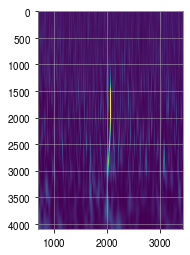

In [ ]:
plt.imshow(qspecgram, vmin=0, vmax=VMAX)
plt.xlim([max_point-int(len(hq)*time_window/6)/2, max_point+int(len(hq)*time_window/6)/2])

In [ ]:
seg_int = 32
segment = (np.ceil(gps)-seg_int/2, np.ceil(gps)+seg_int/2)
data = TimeSeries.fetch_open_data('L1', *segment, sample_rate=16384, cache=True)

In [ ]:
hq = data.q_transform(frange=(10, 2048), outseg=(gps-3,gps+3), tres=.25/(140*6))

In [ ]:
hq[int(2*len(hq)/5):int(3*len(hq)/5),:]

<Spectrogram([[1.6602646 , 1.6602646 , 1.4909122 , ...,
               0.58294153, 0.58294153, 0.58294153],
              [1.6557567 , 1.6557567 , 1.4850084 , ...,
               0.2586107 , 0.2586107 , 0.2586107 ],
              [1.6513106 , 1.6513106 , 1.4791807 , ...,
               0.17776117, 0.17776117, 0.17776117],
              ...,
              [0.8136806 , 0.8136806 , 0.6559688 , ...,
               0.08395797, 0.08395797, 0.08395797],
              [0.810688  , 0.810688  , 0.65339047, ...,
               0.6330873 , 0.6330873 , 0.6330873 ],
              [0.8077162 , 0.8077162 , 0.6508552 , ...,
               1.4063791 , 1.4063791 , 1.4063791 ]]
             unit=Unit(dimensionless),
             name=None,
             epoch=<Time object: scale='utc' format='gps' value=1126259461.8000002>,
             channel=None,
             x0=<Quantity 1.12625946e+09 s>,
             dx=<Quantity 0.00029762 s>,
             xindex=<Index [1.12625946e+09, 1.12625946e+09, 1.12625946e+

In [ ]:
np.argmax(np.max(hq, axis=1))

10140

In [ ]:
shift = -3+(int(2*len(hq)/5)+np.argmax(np.max(hq[int(2*len(hq)/5):int(3*len(hq)/5),:], axis=1)))*.25/(140*6)
shift

0.017857142857142794

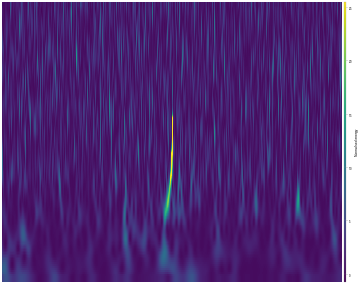

In [ ]:
plot = hq.plot(figsize=(17, 14), xlim=[gps+shift-2, gps+shift+2], vmax=25.5, dpi=20)
plt.yscale('log', base=2)
plt.yticks([])
ax = plt.gca()
ax.axis('off')
plt.tight_layout()
plt.subplots_adjust(bottom=0.,left=0.,right=1.,top=1.001)

img = plt.savefig('test.png', dpi=10)
Image.open('test.png').convert('L').save('test.png')
plot.colorbar(label="Normalised energy");

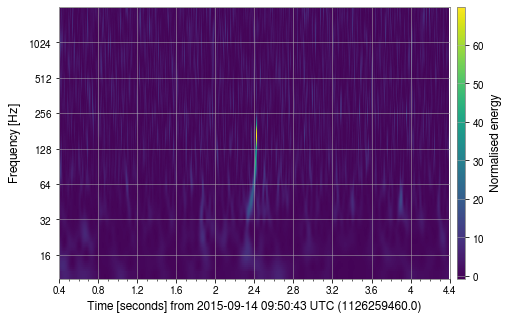

In [ ]:
plot = hq.plot(figsize=(7, 5), xlim=[gps-2, gps+2])
plt.yscale('log', base=2)
plt.yticks([16, 32, 64, 128, 256, 512, 1024])
plot.colorbar(label="Normalised energy");

In [ ]:
hq.shape

(2240, 4076)

In [ ]:
(2048-10)*2

4076

In [ ]:
2240/4/140

4.0

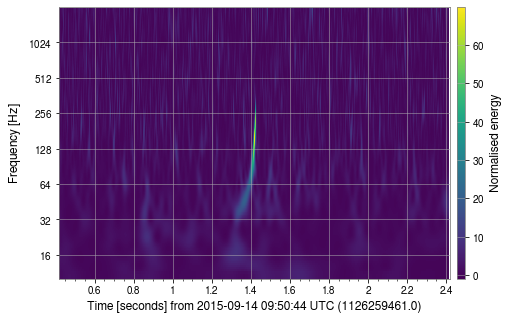

In [ ]:
plot = hq.plot(figsize=(7, 5), xlim=[gps+shift-1, gps+shift+1])
plt.yscale('log', base=2)
plt.yticks([16, 32, 64, 128, 256, 512, 1024])
plot.colorbar(label="Normalised energy");

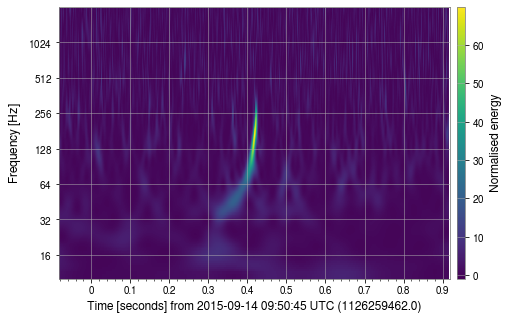

In [ ]:
plot = hq.plot(figsize=(7, 5), xlim=[gps+shift-.5, gps+shift+.5])
plt.yscale('log', base=2)
plt.yticks([16, 32, 64, 128, 256, 512, 1024])
plot.colorbar(label="Normalised energy");

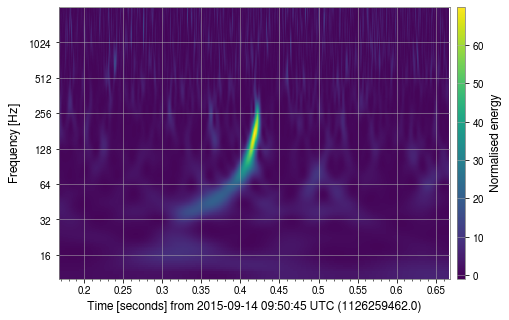

In [ ]:
plot = hq.plot(figsize=(7, 5), xlim=[gps+shift-.25, gps+shift+.25])
plt.yscale('log', base=2)
plt.yticks([16, 32, 64, 128, 256, 512, 1024])
plot.colorbar(label="Normalised energy");

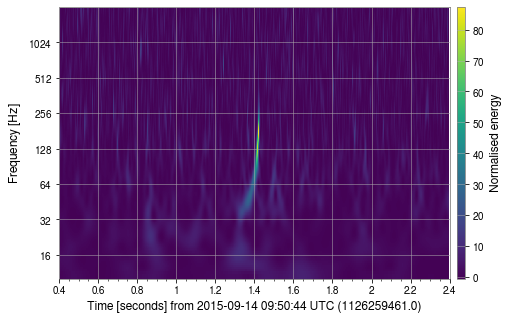

In [ ]:
hq = data.q_transform(frange=(10, 2048), outseg=(gps-1,gps+1))
plot = hq.plot(figsize=(7, 5))
plt.yscale('log', base=2)
plt.yticks([16, 32, 64, 128, 256, 512, 1024])
plot.colorbar(label="Normalised energy");

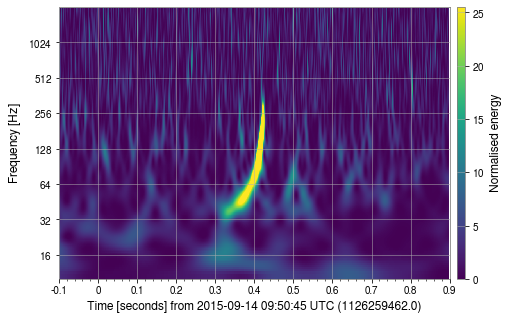

In [ ]:
hq = data.q_transform(frange=(10, 2048), outseg=(gps-0.5,gps+0.5))
plot = hq.plot(figsize=(7, 5))
plt.yscale('log', base=2)
plt.yticks([16, 32, 64, 128, 256, 512, 1024])
plot.colorbar(label="Normalised energy");

In [ ]:
event = 'GW150914-v3'
gps = event_gps(event)
seg_int = 32
sample_rate = 16384
segment = (np.ceil(gps)-seg_int/2, np.ceil(gps)+seg_int/2)
data = TimeSeries.fetch_open_data('L1', *segment, sample_rate=sample_rate, cache=True)

(10.0, 2048.0)

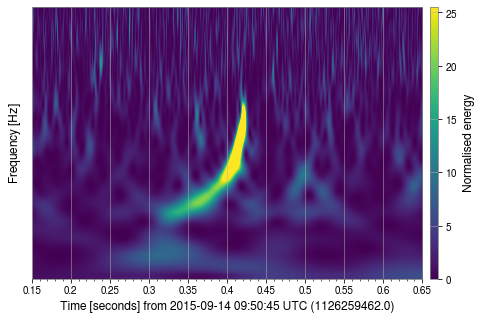

In [ ]:
hq = data.q_transform(frange=(10, 2048), outseg=(gps-.25,gps+0.25), fres=2048*2, tres=0.5/(2048*2), logf=True)
plot = hq.plot(figsize=(7, 5), vmin=0, vmax=25.5, ylim=[10, 2048])
plt.yticks([])
plot.colorbar(label="Normalised energy");

ax = plt.gca()
ax.get_ylim()

(10.0, 2048.0)

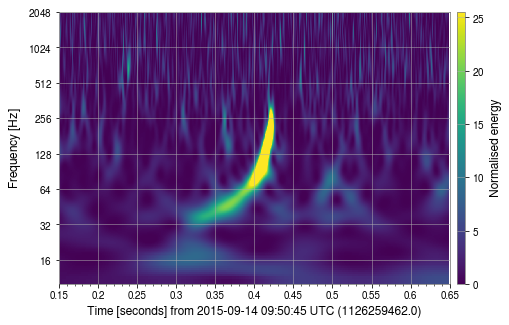

In [ ]:
hq = data.q_transform(frange=(10, 2048), outseg=(gps-.25,gps+0.25))
plot = hq.plot(figsize=(7, 5), vmin=0, vmax=25.5)
plt.yscale('log', base=2)
#plt.yticks([16, 32, 64, 128, 256, 512, 1024])
plot.colorbar(label="Normalised energy");

ax = plt.gca()
ax.get_ylim()

(10.0, 2048.0)

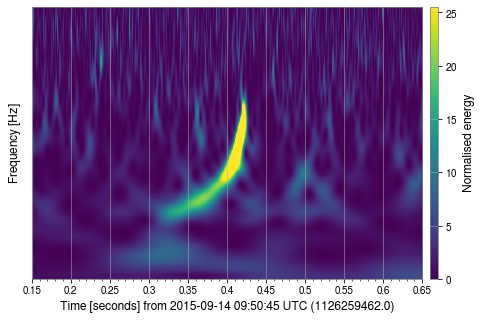

In [ ]:
hq = data.q_transform(frange=(10, 2048), outseg=(gps-.25,gps+0.25), logf=True)
plot = hq.plot(figsize=(7, 5), vmin=0, vmax=25.5, ylim=[10, 2048])
plt.yticks([])
plot.colorbar(label="Normalised energy");

ax = plt.gca()
ax.get_ylim()

In [ ]:
event = 'GW150914-v3'
gps = event_gps(event)
seg_int = 32
sample_rate = 4096
segment = (np.ceil(gps)-seg_int/2, np.ceil(gps)+seg_int/2)
data = TimeSeries.fetch_open_data('L1', *segment, sample_rate=sample_rate, cache=True)

(10.0, 2048.0)

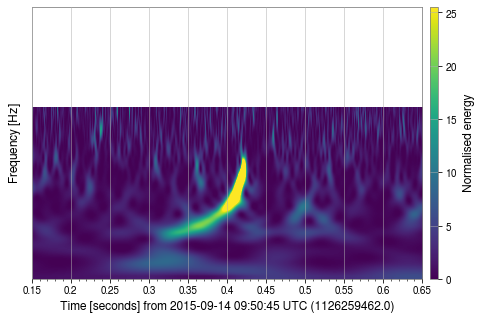

In [ ]:
hq = data.q_transform(frange=(10, 2048), outseg=(gps-.25,gps+0.25), fres=2048*2, tres=0.5/(2048*2), logf=True)
plot = hq.plot(figsize=(7, 5), vmin=0, vmax=25.5, ylim=[10, 2048])
plt.yticks([])
plot.colorbar(label="Normalised energy");

ax = plt.gca()
ax.get_ylim()

(10.0, 2048.0)

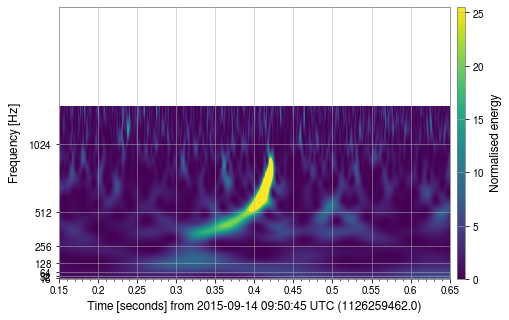

In [ ]:
hq = data.q_transform(frange=(10, 2048), outseg=(gps-.25,gps+0.25), logf=True)
plot = hq.plot(figsize=(7, 5), vmin=0, vmax=25.5, ylim=[10, 2048])
plt.yticks([16, 32, 64, 128, 256, 512, 1024])
#plt.yticks([])
plot.colorbar(label="Normalised energy");

ax = plt.gca()
ax.get_ylim()

(10.0, 2048.0)

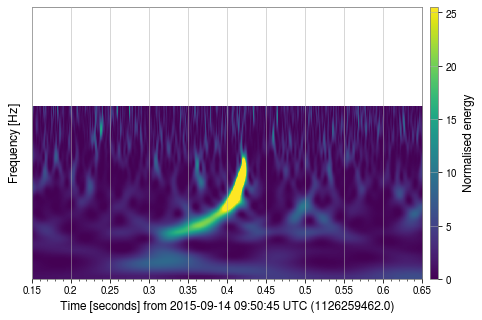

In [ ]:
hq = data.q_transform(frange=(10, 2048), outseg=(gps-.25,gps+0.25), logf=True)
plot = hq.plot(figsize=(7, 5), vmin=0, vmax=25.5, ylim=[10, 2048])
plt.yticks([])
plot.colorbar(label="Normalised energy");

ax = plt.gca()
ax.get_ylim()

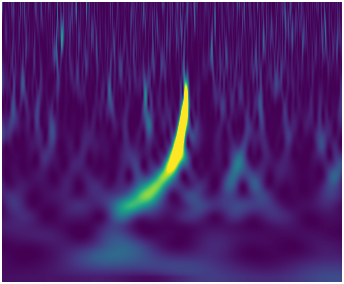

In [ ]:
hq = data.q_transform(frange=(10, 2048), outseg=(gps-.25,gps+0.25), fres=2048*2, tres=0.5/(2048*2), logf=True)
plot = hq.plot(figsize=(17, 14), vmin=0, vmax=25.5, dpi=20)
plt.yticks([])
ax = plt.gca()
ax.axis('off')
plt.tight_layout()
plt.subplots_adjust(bottom=0.,left=0.,right=1.,top=1.001)

img = plt.savefig('test.png', dpi=10)
Image.open('test.png').convert('L').save('test.png')